In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
data = pd.read_csv(r"C:\Users\hp\Downloads\Sample - Superstore (1).csv", encoding="ISO-8859-1")


In [52]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

# Converting Date Columns

In [55]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date']) 

# Adding New Date-Based Columns

In [57]:
data['Order Month'] = data['Order Date'].dt.month 
data['Order Year'] = data['Order Date'].dt.year
data['Order Day of Week'] = data['Order Date'].dt.dayofweek

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Row ID             9994 non-null   int64         
 1   Order ID           9994 non-null   object        
 2   Order Date         9994 non-null   datetime64[ns]
 3   Ship Date          9994 non-null   datetime64[ns]
 4   Ship Mode          9994 non-null   object        
 5   Customer ID        9994 non-null   object        
 6   Customer Name      9994 non-null   object        
 7   Segment            9994 non-null   object        
 8   Country            9994 non-null   object        
 9   City               9994 non-null   object        
 10  State              9994 non-null   object        
 11  Postal Code        9994 non-null   int64         
 12  Region             9994 non-null   object        
 13  Product ID         9994 non-null   object        
 14  Category

# Monthly Sales Analysis

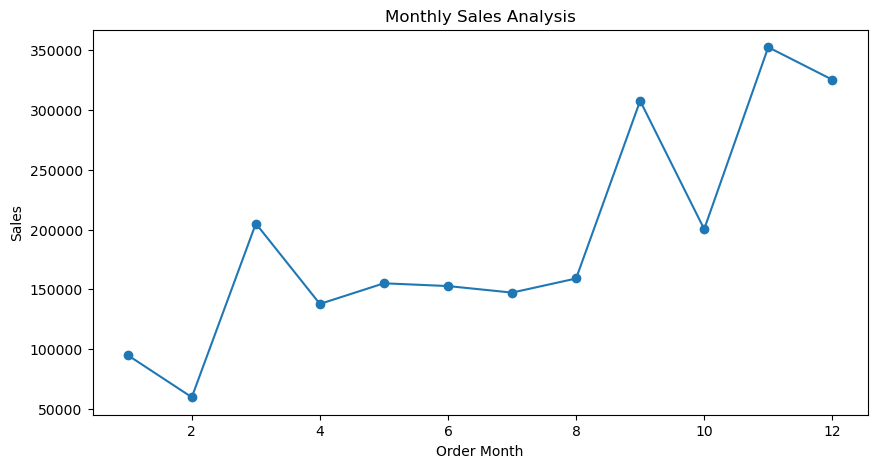

In [60]:
sales_by_month = data.groupby('Order Month')['Sales'].sum().reset_index()
plt.figure(figsize=(10,5))  # Optional: Adjusts figure size
plt.plot(sales_by_month['Order Month'], sales_by_month['Sales'], marker='o', linestyle='-')
plt.xlabel('Order Month')
plt.ylabel('Sales')
plt.title('Monthly Sales Analysis')
plt.show()


# Sales Analysis by Category

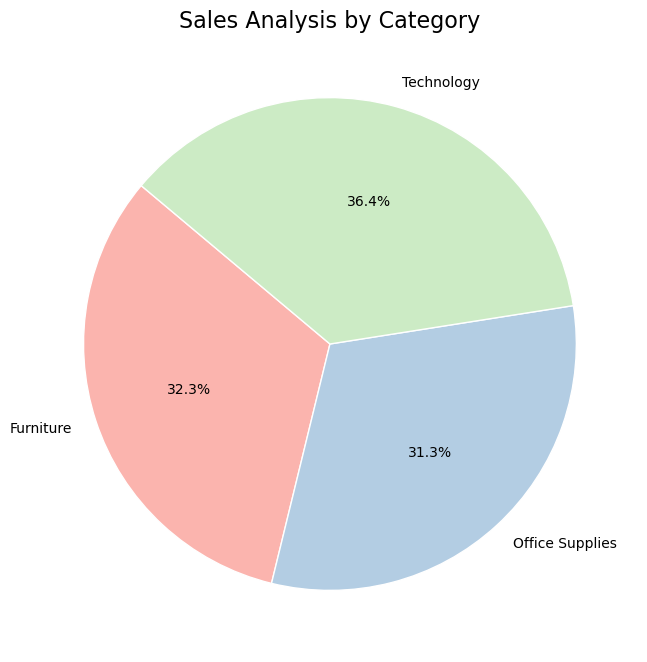

In [62]:
# Grouping sales by category
sales_by_category = data.groupby('Category')['Sales'].sum().reset_index()

# Extracting values for plotting
categories = sales_by_category['Category']
sales = sales_by_category['Sales']

# Creating the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(sales, labels=categories, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'white'}, colors=plt.cm.Pastel1.colors)

# Adding title
plt.title("Sales Analysis by Category", fontsize=16)

# Show the plot
plt.show()


# Sales Analysis by Sub-Category

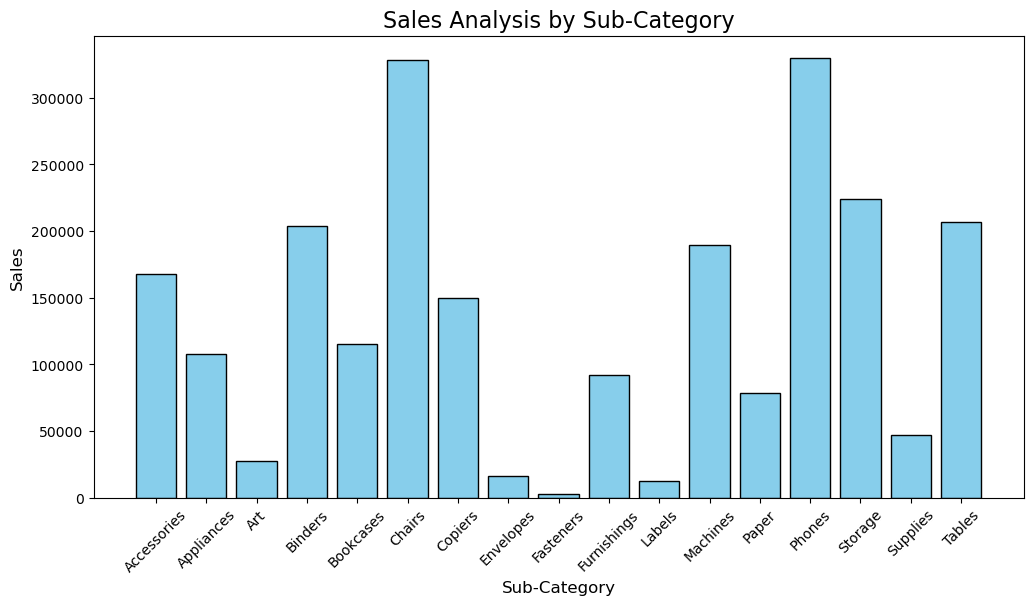

In [64]:
# Grouping sales by Sub-Category
sales_by_subcategory = data.groupby('Sub-Category')['Sales'].sum().reset_index()

# Extracting values for plotting
subcategories = sales_by_subcategory['Sub-Category']
sales = sales_by_subcategory['Sales']

# Creating the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(subcategories, sales, color='skyblue', edgecolor='black')

# Adding labels and title
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Sales", fontsize=12)
plt.title("Sales Analysis by Sub-Category", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show
plt.show()

# Monthly Profit Analysis

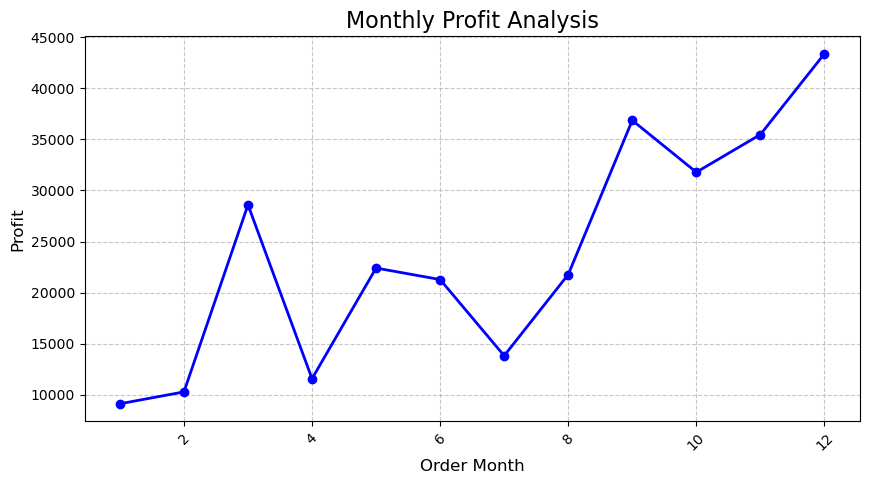

In [66]:
# Grouping profit by month
profit_by_month = data.groupby('Order Month')['Profit'].sum().reset_index()

# Extracting values for plotting
months = profit_by_month['Order Month']
profit = profit_by_month['Profit']

# Creating the line chart
plt.figure(figsize=(10, 5))  # Set figure size
plt.plot(months, profit, marker='o', linestyle='-', color='b', linewidth=2)

# Adding labels and title
plt.xlabel("Order Month", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("Monthly Profit Analysis", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.grid(True, linestyle='--', alpha=0.7)  # Adding grid lines

# Show the plot
plt.show()


# Profit Analysis by Category

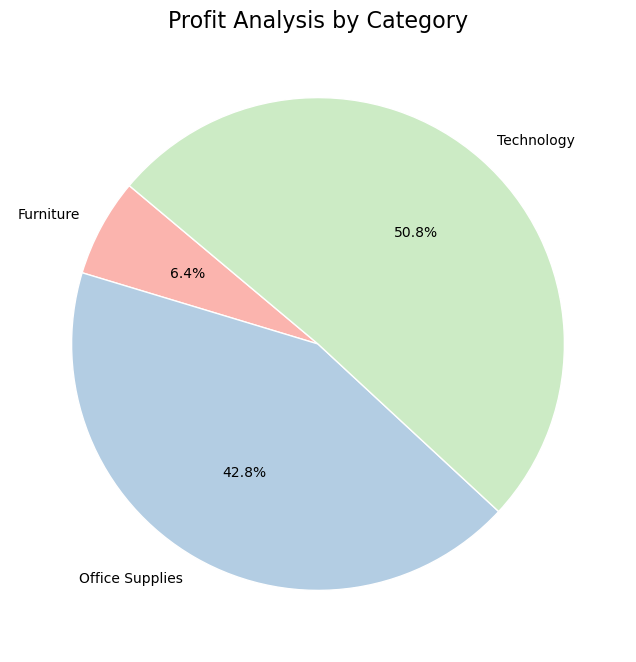

In [68]:
# Grouping profit by category
profit_by_category = data.groupby('Category')['Profit'].sum().reset_index()

# Extracting values for plotting
categories = profit_by_category['Category']
profit = profit_by_category['Profit']

# Creating the pie chart
plt.figure(figsize=(8, 8))  # Set figure size
plt.pie(profit, labels=categories, autopct='%1.1f%%', startangle=140, 
        wedgeprops={'edgecolor': 'white'}, colors=plt.cm.Pastel1.colors)

# Adding title
plt.title("Profit Analysis by Category", fontsize=16)

# Show the plot
plt.show()


# Profit Analysis by Sub-Category

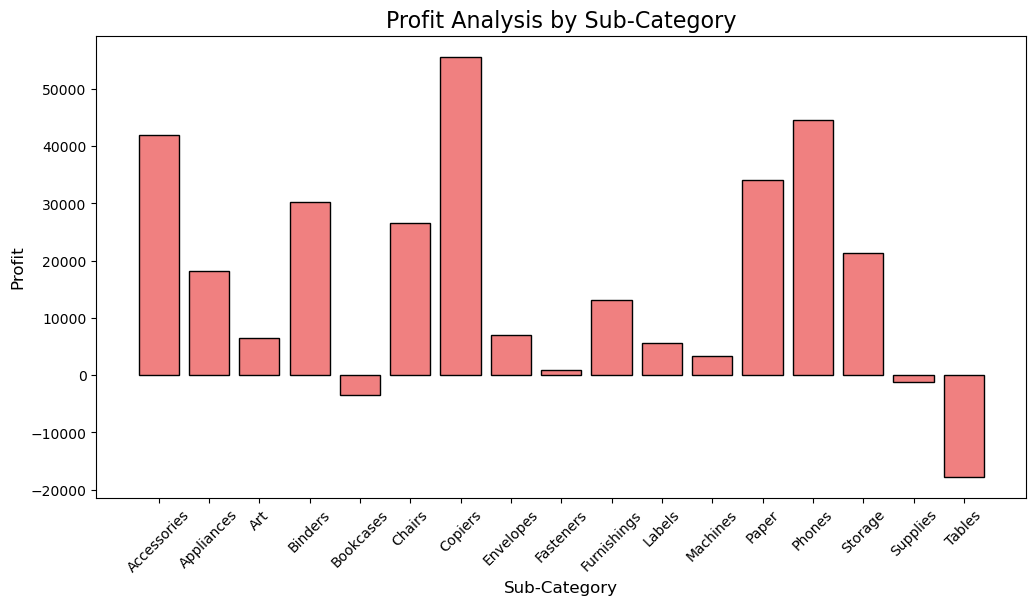

In [70]:
# Grouping profit by Sub-Category
profit_by_subcategory = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# Extracting values for plotting
subcategories = profit_by_subcategory['Sub-Category']
profit = profit_by_subcategory['Profit']

# Creating the bar chart
plt.figure(figsize=(12, 6))  # Set figure size
plt.bar(subcategories, profit, color='lightcoral', edgecolor='black')

# Adding labels and title
plt.xlabel("Sub-Category", fontsize=12)
plt.ylabel("Profit", fontsize=12)
plt.title("Profit Analysis by Sub-Category", fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


# Analyzing sales-to-profit ratio

In [72]:
sales_profit_by_segment = data.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()
sales_profit_by_segment['Sales_to_Profit_Ratio'] = sales_profit_by_segment['Sales'] / sales_profit_by_segment['Profit']
print(sales_profit_by_segment[['Segment', 'Sales_to_Profit_Ratio']])

       Segment  Sales_to_Profit_Ratio
0     Consumer               8.659471
1    Corporate               7.677245
2  Home Office               7.125416
